In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['-1.14-windows.xml', '.anaconda', '.android', '.bash_history', '.conda', '.condarc', '.continuum', '.dotnet', '.git', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.templateengine', '.thinkorswim', '.vscode', 'anaconda3', 'AppData', 'Application Data', 'cleveland.data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'git_workshop', 'heart-disease.ipynb', 'heart_code.ipynb', 'heart_code1.ipynb', 'heart_predict.ipynb', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'Microsoft', 'MinGW Installer.lnk', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{3fe339f1-9e46-11ed-9c03-df19d97e32aa}.TM.blf', 'NTUSER.DAT{3fe339f1-9e46-11ed-9c03-df19d97e32aa}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{3fe339f1-9e46-11ed-9c03-df19d97e32aa}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'source', 'Start Men

In [2]:
import pandas as pd

dataset = pd.read_csv(r"C:\Users\mohak\OneDrive\Desktop\Heart\SilverCombined_HeartData_.csv")


In [3]:
type(dataset)
dataset.shape
dataset.head(5)
dataset.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           720 non-null    int64  
 1   Blood Pressure                720 non-null    int64  
 2   Chest Pain type               720 non-null    int64  
 3   Resting Blood Pressure        720 non-null    int64  
 4   Cholesterol                   720 non-null    int64  
 5   Fasting Blood Sugar           720 non-null    int64  
 6   Resting Electrocardiographic  720 non-null    int64  
 7   Maximum Heart Rate            720 non-null    int64  
 8   Exercise-Induced Angina       720 non-null    int64  
 9   OLDPEAK                       720 non-null    float64
 10  SLOPE                         720 non-null    int64  
 11  CA                            720 non-null    int64  
 12  Thallium                      720 non-null    int64  
 13  NUM  

NUM                             1.000000
Chest Pain type                 0.436561
Thallium                        0.426425
SLOPE                           0.397802
OLDPEAK                         0.392544
CA                              0.376247
Maximum Heart Rate              0.362902
Exercise-Induced Angina         0.358739
AGE                             0.285736
Cholesterol                     0.258642
Blood Pressure                  0.237417
Resting Electrocardiographic    0.164676
Fasting Blood Sugar             0.076237
Resting Blood Pressure          0.063570
Name: NUM, dtype: float64


AttributeError: 'DataFrame' object has no attribute 'target'

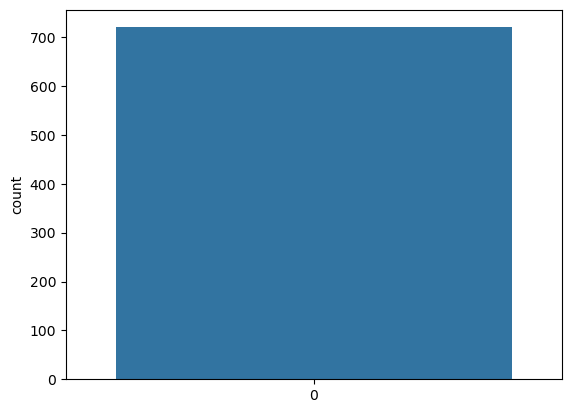

In [4]:
dataset["NUM"].describe()
print(dataset.corr()["NUM"].abs().sort_values(ascending=False))

y = dataset["NUM"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

AttributeError: 'DataFrame' object has no attribute 'target'

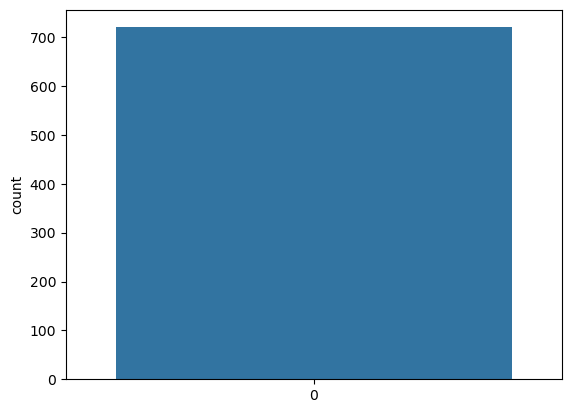

In [5]:

y = dataset["NUM"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [6]:
dataset["NUM"].describe()

count    720.000000
mean       0.850000
std        1.076878
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        4.000000
Name: NUM, dtype: float64

In [7]:
print(dataset.corr()["NUM"].abs().sort_values(ascending=False))

NUM                             1.000000
Chest Pain type                 0.436561
Thallium                        0.426425
SLOPE                           0.397802
OLDPEAK                         0.392544
CA                              0.376247
Maximum Heart Rate              0.362902
Exercise-Induced Angina         0.358739
AGE                             0.285736
Cholesterol                     0.258642
Blood Pressure                  0.237417
Resting Electrocardiographic    0.164676
Fasting Blood Sugar             0.076237
Resting Blood Pressure          0.063570
Name: NUM, dtype: float64


AttributeError: 'DataFrame' object has no attribute 'target'

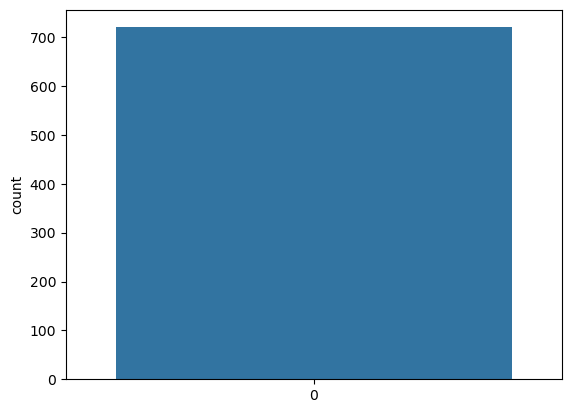

In [8]:
y = dataset["NUM"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)


In [9]:

dataset["Resting Electrocardiographic"].unique()

array([2, 0, 1], dtype=int64)

In [10]:
sns.barplot(dataset["Resting Electrocardiographic"],y)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

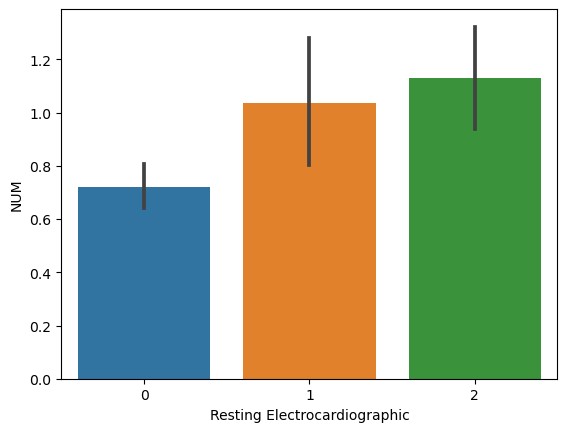

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "Resting Electrocardiographic" is a categorical variable in your dataset
sns.barplot(x=dataset["Resting Electrocardiographic"], y=y)
plt.show()


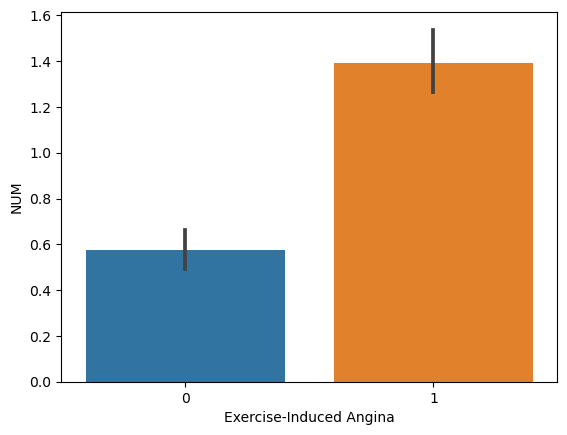

In [12]:
dataset["Exercise-Induced Angina"].unique()
sns.barplot(x=dataset["Exercise-Induced Angina"], y=y)
plt.show()

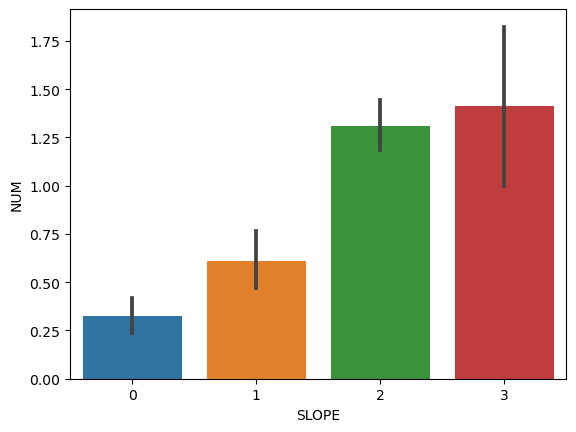

In [13]:
dataset["SLOPE"].unique()
sns.barplot(x=dataset["SLOPE"],y=y)
plt.show()

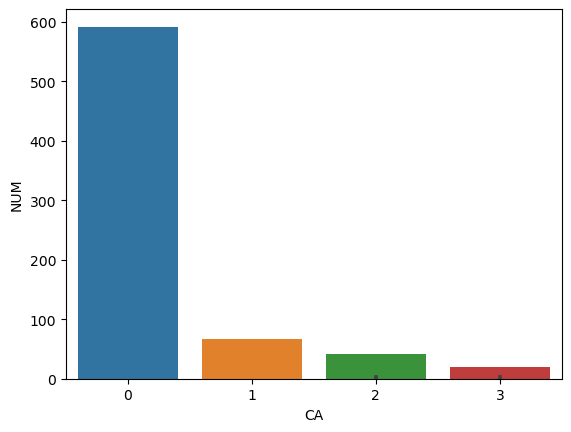

In [14]:
dataset["CA"].unique()
sns.countplot(x=dataset["CA"])
sns.barplot(x=dataset["CA"],y=y)

plt.show()

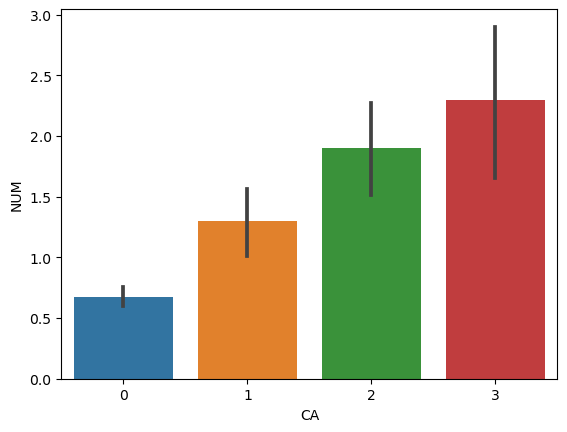

In [15]:
sns.barplot(x=dataset["CA"],y=y)
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("NUM",axis=1)
target = dataset["NUM"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.10, random_state=0)



In [17]:
X_train.shape

(648, 13)

In [18]:
X_test.shape

(72, 13)

In [19]:
Y_train.shape


(648,)

In [20]:
Y_test.shape



(72,)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [23]:
Y_pred_lr.shape


(72,)

In [24]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 52.78 %


In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape

(72,)

In [26]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 59.72 %


In [27]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

(72,)

In [28]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 54.17 %


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

(72,)

In [30]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 44.44 %


In [31]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)


(72,)


In [32]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")


The accuracy score achieved using Decision Tree is: 63.89 %


In [33]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [34]:
pip install ipykernel --upgrade

  Obtaining dependency information for ipykernel from https://files.pythonhosted.org/packages/1e/36/1c316a31d42d323de41616c98e353bd1db1b716980c90929832de4755f80/ipykernel-6.27.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
   --- ------------------------------------ 10.2/114.6 kB ? eta -:--:--
   --- ------------------------------------ 10.2/114.6 kB ? eta -:--:--
   --- ------------------------------------ 10.2/114.6 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/114.6 kB 187.9 kB/s eta 0:00:01
   ---------- ---------------------------- 30.7/114.6 kB 187.9 kB/s eta 0:00:01
   ---------- ---------------------------- 30.7/114.6 kB 187.9 kB/s eta 0:00:01
   ---------- ---------------------------- 30.7/114.6 kB 187.9 kB/s eta 0:00:01
   ---------- ---------------------------- 30.7

In [35]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [36]:
Y_pred_rf.shape


(72,)

In [37]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 66.67 %


In [38]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [39]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [40]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [41]:
Y_pred_xgb.shape


(72,)

In [42]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 62.5 %


In [51]:
from sklearn.metrics import accuracy_score

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

ValueError: could not convert string to float: '?'

In [53]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
def get_user_input():
    user_input = []
    print("Enter values for the following features:")
    for column in X.columns:
        value = float(input(f"{column}: "))
        user_input.append(value)
    return [user_input]

# Use the trained model to make predictions on user input
user_input = get_user_input()
prediction = model.predict(user_input)

if prediction[0] == 1:
    print("The model predicts that the person may have heart disease.")
else:
    print("The model predicts that the person may not have heart disease.")


Enter values for the following features:
Age: 48
sex: 1
CP: 2
trestbps: 110
chol: 229
fbs: 0
restecg: 0
thalach: 168
exang: 0
oldpeak: 1
slope: 3
ca: 0
thal: 7


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.